In [10]:
%matplotlib inline
import xgboost
import sklearn
import matplotlib
import matplotlib.pyplot as plt 

import numpy as np
import pandas as pd
import time
from collections import Counter
from IPython.display import display, HTML

from sklearn.preprocessing import Imputer
from sklearn.externals import joblib
from sklearn.cross_validation import train_test_split, StratifiedKFold, cross_val_score
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score,log_loss, accuracy_score, make_scorer
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)
pd.set_option('precision', 3)
np.set_printoptions(precision=3)
seed = 1234
#seed = None


print("Numpy:",np.__version__)
print("Pandas:",pd.__version__)
print("XGBoost:",xgboost.__version__)
print("sklearn:",sklearn.__version__)
print("matplotlib:",matplotlib.__version__)


##MODEL CONFIG
params = {
    'max_depth': 3,
    'learning_rate': 0.26046515748913901,
    'silent': 0,
    'n_estimators': 10,
    'colsample_bytree': 0.81958831684028921,
    'gamma':0.25,
    'subsample':0.93168572417786366,
    'min_child_weight':0.9,
    'colsample_bylevel':1,
    'max_delta_step':0,
    'reg_alpha':0,
    'scale_pos_weight':1,
    'missing':None,
    'objective': 'multi:softmax',
    'nthread': 4
}

RF_N_TREES=10

input_file = "/notebooks/data/ait_result_dataset.V37.csv"
df = pd.read_csv(input_file, header = 0)
df=df.drop('target',axis=1)
ref=pd.read_csv('/notebooks/References/REF_V3.csv',header=None)
rec=ref[0]
y=ref[1].as_matrix()
print("y: "+str(y.shape))
classes= np.unique(y)
print(classes)
df=df.dropna(axis=1, how='all')
print("DF after dropna: "+str(df.shape))

#drop "combined" columns
#display(pd.DataFrame(df.columns))
#filter_col = [col for col in df if col.lower().startswith('qrs_')]
#display(len(filter_col))
#df=df.drop(filter_col,axis=1)
#print("df: "+str(df.shape))

X=df.as_matrix()
imp = Imputer(missing_values='NaN', strategy='mean', axis=0,verbose=1)
X=imp.fit_transform(X)
print("X after imputer:"+str(X.shape))




Numpy: 1.14.0
Pandas: 0.22.0
XGBoost: 0.7.post3
sklearn: 0.19.1
matplotlib: 1.5.1
y: (8528,)
['A' 'N' 'O' '~']
DF after dropna: (8528, 386)
X after imputer:(8528, 386)



# Plotting Validation Curves


In this plot you can see the training scores and validation scores of an SVM
for different values of the kernel parameter gamma. For very low values of
gamma, you can see that both the training score and the validation score are
low. This is called underfitting. Medium values of gamma will result in high
values for both scores, i.e. the classifier is performing fairly well. If gamma
is too high, the classifier will overfit, which means that the training score
is good but the validation score is poor.



Automatically created module for IPython interactive environment


[3, 4, 5, 6, 7, 8, 9]

/opt/conda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

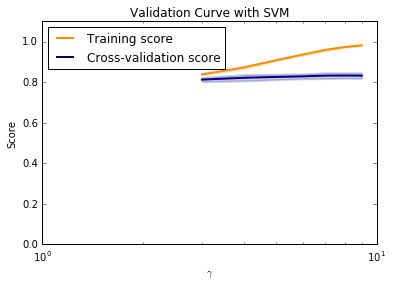

In [11]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

estimator = XGBClassifier(**params).fit(X, y,verbose=50)

scorer = make_scorer(f1_score, labels=['A','O','N'], average='macro')


param_range = [3,4,5,6,7,8,9]
display(param_range)
train_scores, test_scores = validation_curve(
    estimator, X, y, param_name="max_depth", param_range=param_range,
    cv=5, scoring=scorer, n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()